## Perform standard imports, load and plot the dataset

In [1]:
# load the libraries needed and the Energy Production dataset, and to plot the data.
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df = pd.read_csv('../Data/TimeSeriesData/Energy_Production.csv',index_col=0,parse_dates=True)
print(len(df))

325


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 325 entries, 1992-01-01 to 2019-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  325 non-null    float64
dtypes: float64(1)
memory usage: 5.1 KB


In [2]:
df.isna().sum()

IPG2211A2N    0
dtype: int64

In [3]:
df.dropna(inplace=True)
print(len(df))
df.head()

325


,IPG2211A2N
DATE,
1992-01-01,85.5560
1992-02-01,80.4178
1992-03-01,74.7390
1992-04-01,69.8367
1992-05-01,67.3781


In [4]:
df.tail()

,IPG2211A2N
DATE,
2018-09-01,101.5656
2018-10-01,95.3203
2018-11-01,103.5750
2018-12-01,112.9498
2019-01-01,123.7687


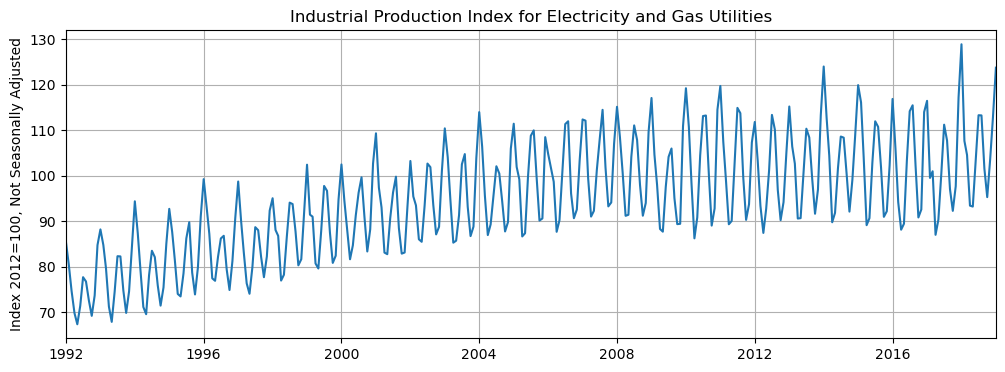

In [5]:
plt.figure(figsize=(12,4))
plt.title('Industrial Production Index for Electricity and Gas Utilities')
plt.ylabel('Index 2012=100, Not Seasonally Adjusted')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['IPG2211A2N'])
plt.show()

## Divide the data into train and test sets

##### Set window_size as 12, divide the dataset into a sequence of 313 training records (including the window), and a test set of 12 records.

In [14]:
y = df['IPG2211A2N'].values

In [15]:
y

array([ 85.556 ,  80.4178,  74.739 ,  69.8367,  67.3781,  71.4197,
        77.7263,  76.7791,  72.5681,  69.2363,  73.7175,  84.7818,
        88.2287,  84.7919,  79.6885,  71.2731,  67.9111,  74.5503,
        82.3366,  82.2906,  74.8323,  69.8758,  74.6278,  84.4669,
        94.4017,  87.4053,  79.4751,  71.1817,  69.5934,  78.1988,
        83.5287,  82.1321,  75.9181,  71.4802,  75.4754,  85.0772,
        92.7412,  87.667 ,  81.5205,  74.0457,  73.5003,  78.5503,
        86.2425,  89.8063,  78.7442,  73.9353,  79.8903,  91.0933,
        99.2688,  93.1691,  87.2075,  77.4715,  76.9337,  82.1958,
        86.2321,  86.824 ,  79.4425,  74.911 ,  81.3   ,  90.753 ,
        98.7482,  90.0486,  83.2671,  76.3793,  74.0777,  80.0138,
        88.7168,  88.0487,  82.1801,  77.7266,  82.2802,  92.3623,
        95.0701,  88.0838,  86.8125,  76.9828,  78.2652,  86.7123,
        94.1078,  93.7954,  87.7915,  80.3296,  81.6742,  91.9551,
       102.4467,  91.4671,  91.0236,  80.7497,  79.6373,  88.1

In [16]:
test_size = 12
window_size = 12

In [17]:
train_set = y[:-test_size]
test_set = y[-test_size:]

In [18]:
print(f'Train: {len(train_set)}')
print(f'Test:  {len(test_set)}')

Train: 313
Test:  12


## Normalize the training set

##### Feature scale the training set to fit within the range [-1, 1]

In [20]:
scaler = MinMaxScaler(feature_range=(-1, 1))

In [21]:
train_norm = scaler.fit_transform(train_set.reshape(-1, 1))

In [27]:
train_norm

array([[-0.4091274 ],
       [-0.57614458],
       [-0.76073396],
       [-0.92008321],
       [-1.        ],
       [-0.8686278 ],
       [-0.66363178],
       [-0.69442052],
       [-0.83129906],
       [-0.93959921],
       [-0.79393782],
       [-0.43429277],
       [-0.3222513 ],
       [-0.43396447],
       [-0.59985048],
       [-0.87339303],
       [-0.98267484],
       [-0.76686766],
       [-0.51377399],
       [-0.51526922],
       [-0.75770125],
       [-0.91881227],
       [-0.76434852],
       [-0.4445286 ],
       [-0.12159795],
       [-0.34901591],
       [-0.60678704],
       [-0.87636399],
       [-0.92799168],
       [-0.64827317],
       [-0.47502479],
       [-0.52042126],
       [-0.72240732],
       [-0.86666125],
       [-0.73679728],
       [-0.4246908 ],
       [-0.17557249],
       [-0.34050935],
       [-0.54030132],
       [-0.78326968],
       [-0.8009979 ],
       [-0.63684767],
       [-0.38681272],
       [-0.27097141],
       [-0.63054495],
       [-0

In [24]:
train_norm.shape

(313, 1)

In [26]:
# Check the scaled data in training set

print(f'First item, original: {train_set[0]}')
print(f'First item, scaled:  {train_norm[0]}')

First item, original: 85.556
First item, scaled:  [-0.4091274]


## Prepare data for LSTM

##### Prepare the list of windowed sequence/label tuples to be fed into an LSTM model.

In [28]:
train_norm = torch.FloatTensor(train_norm).view(-1)

In [29]:
train_norm

tensor([-0.4091, -0.5761, -0.7607, -0.9201, -1.0000, -0.8686, -0.6636, -0.6944,
        -0.8313, -0.9396, -0.7939, -0.4343, -0.3223, -0.4340, -0.5999, -0.8734,
        -0.9827, -0.7669, -0.5138, -0.5153, -0.7577, -0.9188, -0.7643, -0.4445,
        -0.1216, -0.3490, -0.6068, -0.8764, -0.9280, -0.6483, -0.4750, -0.5204,
        -0.7224, -0.8667, -0.7368, -0.4247, -0.1756, -0.3405, -0.5403, -0.7833,
        -0.8010, -0.6368, -0.3868, -0.2710, -0.6305, -0.7869, -0.5933, -0.2291,
         0.0366, -0.1617, -0.3554, -0.6719, -0.6894, -0.5184, -0.3872, -0.3679,
        -0.6078, -0.7551, -0.5475, -0.2402,  0.0197, -0.2631, -0.4835, -0.7074,
        -0.7822, -0.5893, -0.3064, -0.3281, -0.5189, -0.6636, -0.5156, -0.1879,
        -0.0999, -0.3270, -0.3683, -0.6878, -0.6461, -0.3715, -0.1312, -0.1413,
        -0.3365, -0.5790, -0.5353, -0.2011,  0.1399, -0.2170, -0.2314, -0.5654,
        -0.6015, -0.3258, -0.0119, -0.0468, -0.3463, -0.5616, -0.5104, -0.1095,
         0.1415, -0.1177, -0.3184, -0.53

In [30]:
def input_data(seq,ws):
    out = []
    L = len(seq)
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    return out

In [31]:
train_data = input_data(train_norm, window_size)

In [34]:
type(train_data)

list

In [32]:
train_data

[(tensor([-0.4091, -0.5761, -0.7607, -0.9201, -1.0000, -0.8686, -0.6636, -0.6944,
          -0.8313, -0.9396, -0.7939, -0.4343]),
  tensor([-0.3223])),
 (tensor([-0.5761, -0.7607, -0.9201, -1.0000, -0.8686, -0.6636, -0.6944, -0.8313,
          -0.9396, -0.7939, -0.4343, -0.3223]),
  tensor([-0.4340])),
 (tensor([-0.7607, -0.9201, -1.0000, -0.8686, -0.6636, -0.6944, -0.8313, -0.9396,
          -0.7939, -0.4343, -0.3223, -0.4340]),
  tensor([-0.5999])),
 (tensor([-0.9201, -1.0000, -0.8686, -0.6636, -0.6944, -0.8313, -0.9396, -0.7939,
          -0.4343, -0.3223, -0.4340, -0.5999]),
  tensor([-0.8734])),
 (tensor([-1.0000, -0.8686, -0.6636, -0.6944, -0.8313, -0.9396, -0.7939, -0.4343,
          -0.3223, -0.4340, -0.5999, -0.8734]),
  tensor([-0.9827])),
 (tensor([-0.8686, -0.6636, -0.6944, -0.8313, -0.9396, -0.7939, -0.4343, -0.3223,
          -0.4340, -0.5999, -0.8734, -0.9827]),
  tensor([-0.7669])),
 (tensor([-0.6636, -0.6944, -0.8313, -0.9396, -0.7939, -0.4343, -0.3223, -0.4340,
      

In [33]:
# Check results:
print(f'Train_data: {len(train_data)}') 

Train_data: 301


## Define the model

##### Try use a model with a (1, 64) LSTM layer and a (64, 1) fully connected linear layer.

In [41]:
class LSTMnetwork(nn.Module):

    def __init__(self, input_size=1, hidden_size=64, output_size=1):
        super().__init__()
        self.hidden_size = hidden_size

        # Add the LSTM layer:
        self.lstm = nn.LSTM(input_size, hidden_size)

        # Add the fully-connected layer:
        self.linear = nn.Linear(hidden_size, output_size)

        # Initialize h0 and c0:
        self.hidden = (torch.zeros(1,1,self.hidden_size),
                       torch.zeros(1,1,self.hidden_size))

    def forward(self, seq):
        lstm_out, self.hidden = self.lstm(
            seq.view(len(seq),1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]

In [42]:
# Check the results:
torch.manual_seed(101)
model = LSTMnetwork()
model

LSTMnetwork(
  (lstm): LSTM(1, 64)
  (linear): Linear(in_features=64, out_features=1, bias=True)
)

## Define loss and optimization functions

In [43]:
# loss function (criterion): MSELoss
# optimizer: Adam

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## Train the model

##### Try 50 epochs, train the model and validate the test set.

In [44]:
epochs = 50

import time
start_time = time.time()

for epoch in range(epochs):

    for seq, y_train in train_data:

        optimizer.zero_grad()

        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))

        y_pred = model(seq)

        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch} Loss {loss.item()}')

total_time = time.time() - start_time
print(f'Total training duration is {total_time/60} minutes')

Epoch 0 Loss 0.7314830422401428
Epoch 1 Loss 0.32224392890930176
Epoch 2 Loss 0.24065642058849335
Epoch 3 Loss 0.2275601029396057
Epoch 4 Loss 0.21153593063354492
Epoch 5 Loss 0.19906578958034515
Epoch 6 Loss 0.19067460298538208
Epoch 7 Loss 0.18480707705020905
Epoch 8 Loss 0.1796238124370575
Epoch 9 Loss 0.17441950738430023
Epoch 10 Loss 0.16898858547210693
Epoch 11 Loss 0.16325682401657104
Epoch 12 Loss 0.15732839703559875
Epoch 13 Loss 0.1513940840959549
Epoch 14 Loss 0.1456625759601593
Epoch 15 Loss 0.14030809700489044
Epoch 16 Loss 0.13544116914272308
Epoch 17 Loss 0.1311032474040985
Epoch 18 Loss 0.12727928161621094
Epoch 19 Loss 0.12391792982816696
Epoch 20 Loss 0.12095386534929276
Epoch 21 Loss 0.11832565069198608
Epoch 22 Loss 0.11598344147205353
Epoch 23 Loss 0.11389030516147614
Epoch 24 Loss 0.11202088743448257
Epoch 25 Loss 0.11036170274019241
Epoch 26 Loss 0.10891446471214294
Epoch 27 Loss 0.1076979786157608
Epoch 28 Loss 0.10674428194761276
Epoch 29 Loss 0.106084048748016

## Evaluate the model using the test set

##### Re-initialize the hidden parameters $h_0$ and $c_0$ before running the model.

In [46]:
future = 12

preds = train_norm[-window_size:].tolist()

model.eval()

for i in range(future):

    seq = torch.FloatTensor(preds[-window_size:])

    with torch.no_grad():

        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))

        preds.append(model(seq).item())

In [47]:
# Check the results:
preds[window_size:]

[0.2540278732776642,
 -0.002775084227323532,
 -0.34294822812080383,
 -0.21167585253715515,
 0.23918867111206055,
 0.48914816975593567,
 0.2470799684524536,
 -0.08662211149930954,
 -0.25781765580177307,
 0.02258586883544922,
 0.5441879630088806,
 0.6110795736312866]

## Inverse transform the predicted values

##### Rescale the predicted values up to the original test set range

In [48]:
true_predications = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1,1))

In [49]:
true_predications

array([[105.95764051],
       [ 98.05722592],
       [ 87.59196924],
       [ 91.63049823],
       [105.50111987],
       [113.19099887],
       [105.74389169],
       [ 95.47771405],
       [ 90.21096873],
       [ 98.83744296],
       [114.88427059],
       [116.94215754]])

In [50]:
df['IPG2211A2N'][-12:]

DATE
2018-02-01    107.6711
2018-03-01    104.5716
2018-04-01     93.4491
2018-05-01     93.2405
2018-06-01    103.3083
2018-07-01    113.3178
2018-08-01    113.2758
2018-09-01    101.5656
2018-10-01     95.3203
2018-11-01    103.5750
2018-12-01    112.9498
2019-01-01    123.7687
Name: IPG2211A2N, dtype: float64

## Plot the results

##### Plot the true_predictions values together with the original data.

In [51]:
x = np.arange('2018-02-01', '2019-02-01', dtype='datetime64[M]')

In [52]:
x

array(['2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
       '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01'],
      dtype='datetime64[M]')

In [53]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

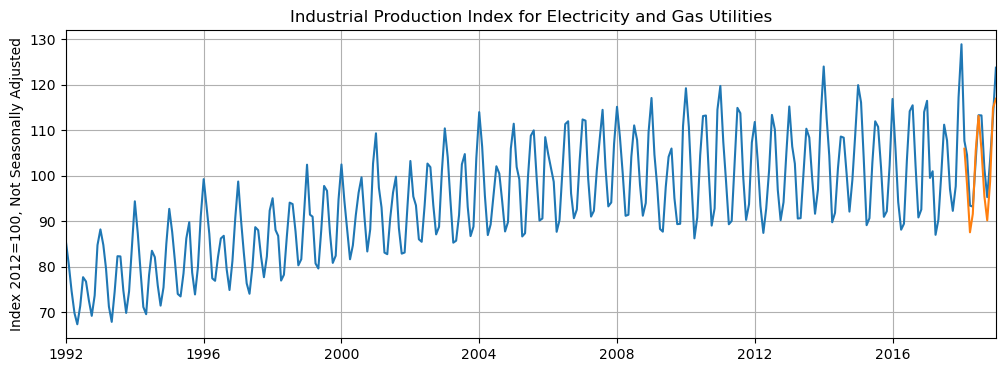

In [55]:
plt.figure(figsize=(12, 4))
plt.title('Industrial Production Index for Electricity and Gas Utilities')
plt.ylabel('Index 2012=100, Not Seasonally Adjusted')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(df['IPG2211A2N'])
plt.plot(x, true_predications)
plt.show()

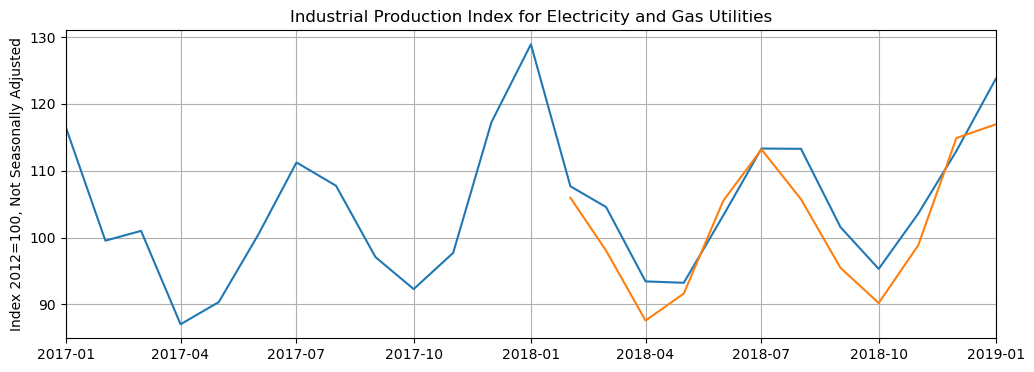

In [60]:
# Plot the end of the graph

fig = plt.figure(figsize=(12,4))
plt.title('Industrial Production Index for Electricity and Gas Utilities')
plt.ylabel('Index 2012=100, Not Seasonally Adjusted')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
#fig.autofmt_xdate()

plt.plot(df['IPG2211A2N']['2017-01-01':])
plt.plot(x, true_predications)
plt.show()

## Forecast into an unknown future

##### Continue training the model using the entire dataset, and predict 12 steps into the future.

In [61]:
epochs = 50

# set model to back to the training mode
model.train()

# feature scale the entire dataset
y_norm = scaler.fit_transform(y.reshape(-1,1))
y_norm = torch.FloatTensor(y_norm).view(-1)
all_data = input_data(y_norm, window_size)

import time
start_time = time.time()

for epoch in range(epochs):

    # train on the full set of sequences
    for seq, y_train in all_data:

        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))

        y_pred = model(seq)

        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    # print training result
    print(f'Epoch: {epoch+1:2} Loss {loss.item():10.8f}')

print(f'\nTotal Duration: {time.time() -start_time:.0f} seconds')

Epoch:  1 Loss 0.00622423
Epoch:  2 Loss 0.00586761
Epoch:  3 Loss 0.00621035
Epoch:  4 Loss 0.00675271
Epoch:  5 Loss 0.00729052
Epoch:  6 Loss 0.00778502
Epoch:  7 Loss 0.00822466
Epoch:  8 Loss 0.00861202
Epoch:  9 Loss 0.00895862
Epoch: 10 Loss 0.00927832
Epoch: 11 Loss 0.00958351
Epoch: 12 Loss 0.00988326
Epoch: 13 Loss 0.01018259
Epoch: 14 Loss 0.01048132
Epoch: 15 Loss 0.01077340
Epoch: 16 Loss 0.01104444
Epoch: 17 Loss 0.01126753
Epoch: 18 Loss 0.01139662
Epoch: 19 Loss 0.01135828
Epoch: 20 Loss 0.01105779
Epoch: 21 Loss 0.01044533
Epoch: 22 Loss 0.00964499
Epoch: 23 Loss 0.00890950
Epoch: 24 Loss 0.00834611
Epoch: 25 Loss 0.00787637
Epoch: 26 Loss 0.00739303
Epoch: 27 Loss 0.00683865
Epoch: 28 Loss 0.00620188
Epoch: 29 Loss 0.00549535
Epoch: 30 Loss 0.00474288
Epoch: 31 Loss 0.00397324
Epoch: 32 Loss 0.00321536
Epoch: 33 Loss 0.00249448
Epoch: 34 Loss 0.00183158
Epoch: 35 Loss 0.00124613
Epoch: 36 Loss 0.00075891
Epoch: 37 Loss 0.00039000
Epoch: 38 Loss 0.00015046
Epoch: 39 Lo

In [62]:
window_size = 12
future = 12
L = len(y)

preds = y_norm[-window_size:].tolist()

model.eval()

for i in range(future):

    seq = torch.FloatTensor(preds[-window_size:])

    with torch.no_grad():

        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))

        preds.append(model(seq).item())

In [66]:
np.array(preds)

array([ 0.30972388,  0.20897463, -0.1525622 , -0.15934275,  0.16791107,
        0.49326983,  0.49190462,  0.11126461, -0.09173886,  0.17658015,
        0.48130801,  0.83297634,  0.51885837,  0.06288058, -0.09775329,
       -0.15780152,  0.32442388,  0.58705962,  0.40154049,  0.17589097,
       -0.32904202,  0.04517299,  0.33748153,  0.762779  ])

In [63]:
true_predictions = scaler.inverse_transform(np.array(preds).reshape(-1,1))

In [64]:
true_predictions

array([[107.67110043],
       [104.57159999],
       [ 93.44910017],
       [ 93.24049994],
       [103.30830004],
       [113.31779971],
       [113.27579957],
       [101.56560006],
       [ 95.32029992],
       [103.5749999 ],
       [112.94980037],
       [123.76870065],
       [114.10501842],
       [100.07708947],
       [ 95.13526902],
       [ 93.28791502],
       [108.12333844],
       [116.20319559],
       [110.49579234],
       [103.55379766],
       [ 88.01978685],
       [ 99.53232443],
       [108.52505048],
       [121.60911447]])

In [67]:
# Plot the result
# Set a data range for the predicted data.

x = np.arange('2019-02-01', '2020-02-01', dtype='datetime64[M]').astype('datetime64[D]')

In [68]:
x

array(['2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
       '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01',
       '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01'],
      dtype='datetime64[D]')

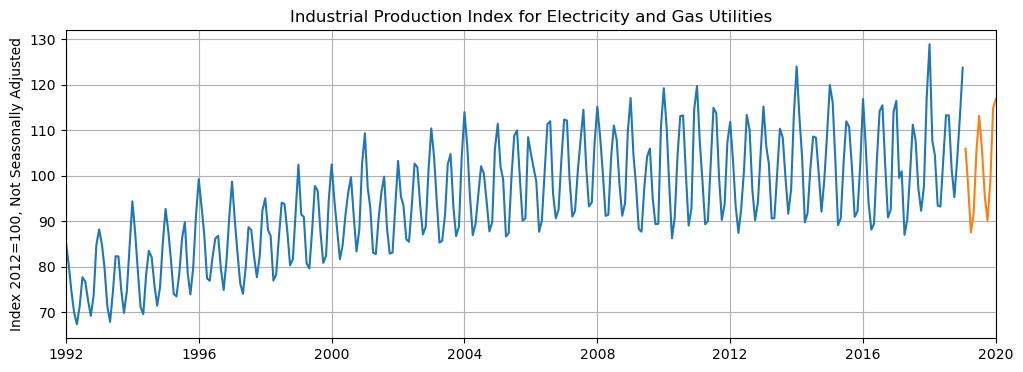

In [70]:
plt.figure(figsize=(12,4))
plt.title('Industrial Production Index for Electricity and Gas Utilities')
plt.ylabel('Index 2012=100, Not Seasonally Adjusted')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(df['IPG2211A2N'])
plt.plot(x, true_predications)
plt.show()

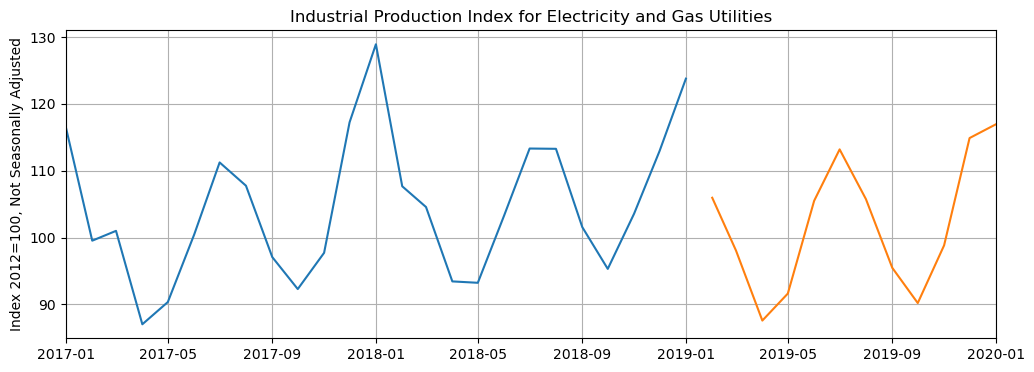

In [74]:
fig = plt.figure(figsize=(12,4))
plt.title('Industrial Production Index for Electricity and Gas Utilities')
plt.ylabel('Index 2012=100, Not Seasonally Adjusted')
plt.grid(True)
plt.autoscale(axis='x', tight=True)

plt.plot(df['IPG2211A2N']['2017-01-01':])
plt.plot(x, true_predications)
plt.show()

# Congrads to myself!